<a href="https://colab.research.google.com/github/VictorSairam/House_Price_Prediction/blob/main/Bangalore_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
data_to_upload = files.upload()

Saving homeprices_banglore.csv to homeprices_banglore.csv
Saving homeprices.csv to homeprices.csv


In [5]:
df = pd.read_csv("homeprices_banglore.csv")

In [8]:
df.sample(5)

,area,bedrooms,price
6,2732,4,135.0
13,1100,2,40.0
2,1440,3,62.0
14,2250,3,101.0
18,2770,3,102.0


In [9]:
from sklearn import preprocessing

Sx = preprocessing.MinMaxScaler()
Sy = preprocessing.MinMaxScaler()

scaled_x = Sx.fit_transform(df.drop('price', axis = 'columns'))

In [10]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [14]:
scaled_y = Sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [16]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [28]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, np.transpose(scaled_x)) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
    
    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(y_true-y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

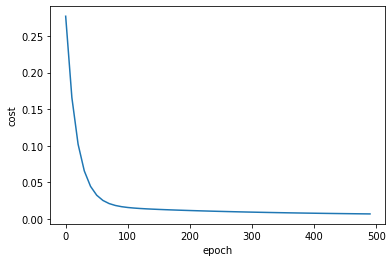

In [29]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [34]:
def predict(area, bedrooms, w, b):
  scaled_X = Sx.transform([[area,bedrooms]])[0]

  scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
  return Sy.inverse_transform([[(scaled_price)]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.45484403267596

In [35]:
predict(1000,2,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


30.253094462442355

In [40]:
import random as random

In [42]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
    
    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.square(sample_y-y_predicted)

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)

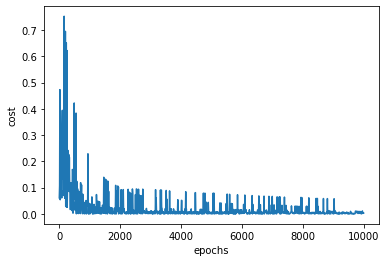

In [43]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [44]:
predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.7029099850368